In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('ggplot')

import nltk


In [12]:
df = pd.read_csv(r'C:\Users\eyas1\Downloads\Pat Bev Data (1).csv')

In [14]:
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\eyas1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Initialize an empty dictionary to store results
res = {}

# Function to calculate sentiment scores and store in res
def get_sentiment(text, idx):
    # Convert text to string if it's not already, handle missing values
    if pd.isna(text):
        text = ""
    text = str(text)
    sentiment_scores = sia.polarity_scores(text)
    res[idx] = sentiment_scores
    return sentiment_scores

# Iterate over each row in the DataFrame using iterrows
tqdm.pandas()
df['sentiment'] = None  # Initialize the sentiment column
for idx, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Content']
    sentiment = get_sentiment(text, idx)
    df.at[idx, 'sentiment'] = sentiment

# Convert the results dictionary to a DataFrame if needed
vaders_df = pd.DataFrame.from_dict(res, orient='index')

# Optionally, merge the sentiment results back into the original DataFrame
df_with_sentiment = df.join(vaders_df, how='left')



100%|██████████| 975/975 [00:00<00:00, 6496.13it/s]


In [21]:
res

{0: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1: {'neg': 0.313, 'neu': 0.687, 'pos': 0.0, 'compound': -0.6249},
 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.4019},
 8: {'neg': 0.168, 'neu': 0.701, 'pos': 0.131, 'compound': -0.2023},
 9: {'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.4019},
 10: {'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'compound': -0.5904},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.3

In [22]:
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.313,0.687,0.000,-0.6249
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
970,0.000,0.654,0.346,0.7840
971,0.043,0.957,0.000,-0.2263
972,0.000,1.000,0.000,0.0000
973,0.000,1.000,0.000,0.0000


In [23]:
vaders = pd.DataFrame(res).T

vaders = vaders.reset_index().rename(columns={'index': 'Id'})

vaders = vaders.merge(df, how = 'left')

In [10]:
vaders.head(20)


,Id,neg,neu,pos,compound,Player @,Content,Date,sentiment
0,0,0.000,0.871,0.129,0.6705,NaN,NaN,NaN,NaN
1,1,0.000,1.000,0.000,0.0000,@patbev21,.@KingJames weighs in on @patbev21’s ‘too smal...,30-Mar-23,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp..."
2,2,0.000,1.000,0.000,0.0000,@patbev21,Someone need to ask Lebron if he think @patbev...,30-Mar-23,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,3,0.115,0.885,0.000,-0.0772,@patbev21,He’s a baby!!!! @patbev21,30-Mar-23,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,4,0.000,1.000,0.000,0.0000,@patbev21,"I fuc w/ ya dawg , but imma leave dis here … @...",30-Mar-23,"{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp..."
5,5,0.000,0.855,0.145,0.2960,@2020sonicboom,Shoutout to all the real ones @antonnewcombe @...,30-Mar-23,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,6,0.000,1.000,0.000,0.0000,@patbev21,Yeah @patbev21 all that talking gon bite you i...,30-Mar-23,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp..."
7,7,0.000,0.690,0.310,0.7430,@patbev21,“It’s smoke when I see you Sas” - @patbev21,30-Mar-23,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,8,0.000,0.233,0.767,0.7650,@patbev21,"It's DEMON TIME, thanks for the inspiration @...",30-Mar-23,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou..."
9,9,0.000,1.000,0.000,0.0000,@patbev21,Wow nice pic @patbev21,30-Mar-23,"{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'comp..."


In [32]:
# Group by the 'Date' column and calculate the mean of 'compound'
average_compound_by_date = vaders.groupby('Date')['compound'].mean()

# If you want the result as a DataFrame instead of a Series, reset the index
average_compound_by_date = average_compound_by_date.reset_index()

average_compound_by_date['Date'] = pd.to_datetime(average_compound_by_date['Date'], format='%d-%b-%y')

average_compound_by_date = average_compound_by_date.sort_values(by='Date')



# Rename the columns for clarity
average_compound_by_date.columns = ['Date', 'Average Compound']

# Display the result
print(average_compound_by_date)


         Date  Average Compound
0  2023-03-01          0.114395
10 2023-03-02          0.017743
21 2023-03-03          0.112183
22 2023-03-04         -0.265867
23 2023-03-05         -0.010293
24 2023-03-06          0.117418
25 2023-03-07          0.064893
26 2023-03-08          0.173500
27 2023-03-09          0.387871
1  2023-03-10          0.257400
2  2023-03-11          0.123546
3  2023-03-12         -0.012233
4  2023-03-13         -0.058200
5  2023-03-14          0.121577
6  2023-03-15          0.107805
7  2023-03-16          0.382056
8  2023-03-18          0.187242
9  2023-03-19          0.251790
11 2023-03-20          0.126847
12 2023-03-21          0.458067
13 2023-03-22          0.082753
14 2023-03-23          0.015069
15 2023-03-24          0.219617
16 2023-03-25          0.088880
17 2023-03-26          0.119299
18 2023-03-27          0.234967
19 2023-03-28          0.023388
20 2023-03-29         -0.082498


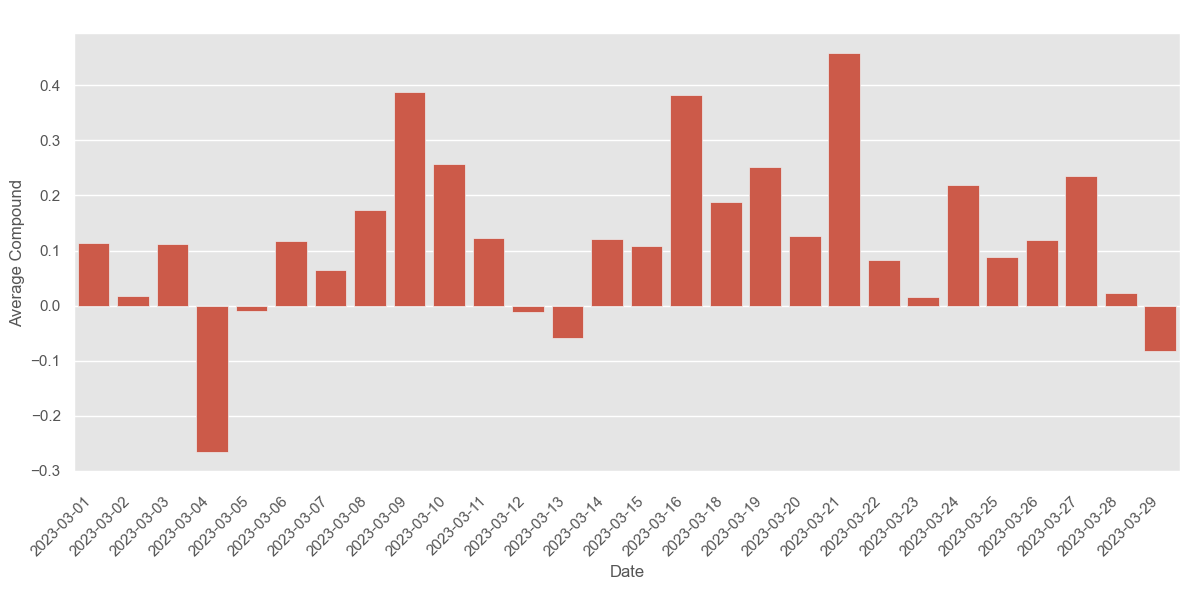

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the barplot
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
sns.barplot(data=average_compound_by_date, x='Date', y='Average Compound')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optional: Adjust x-axis tick parameters for spacing
plt.tick_params(axis='x', which='major', pad=10)  # Adjust padding

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Compound')
plt.title('Average Compound Sentiment by Date')

# Show the plot
plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

In [ ]:
#patrick beverly had an average box plus minus of -0.4 

# on march 

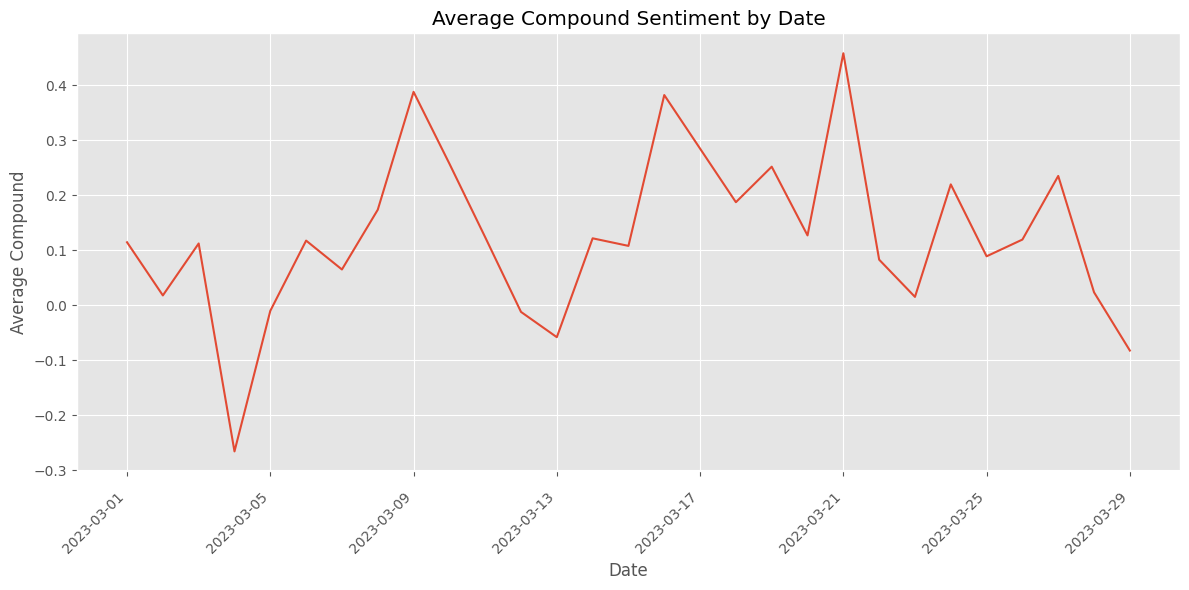

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the barplot
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
sns.lineplot(data=average_compound_by_date, x='Date', y='Average Compound')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optional: Adjust x-axis tick parameters for spacing
plt.tick_params(axis='x', which='major', pad=10)  # Adjust padding

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Compound')
plt.title('Average Compound Sentiment by Date')

# Show the plot
plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

In [72]:
bpm = pd.read_csv(r'C:\Users\eyas1\Downloads\BPM 23.csv')

In [73]:
bpm.head(15)

,Rk,G,Date,+/-
0,60.0,49.0,3/1/2023,16.0
1,61.0,50.0,3/3/2023,-12.0
2,62.0,51.0,3/5/2023,3.0
3,63.0,52.0,3/8/2023,6.0
4,64.0,53.0,3/11/2023,17.0
5,65.0,54.0,3/15/2023,-8.0
6,66.0,55.0,3/17/2023,13.0
7,67.0,56.0,3/18/2023,12.0
8,68.0,57.0,3/20/2023,-3.0
9,69.0,58.0,3/22/2023,-27.0


In [60]:
average_compound_by_date.head(15)

,Date,Average Compound
0,2023-03-01,0.114395
10,2023-03-02,0.017743
21,2023-03-03,0.112183
22,2023-03-04,-0.265867
23,2023-03-05,-0.010293
24,2023-03-06,0.117418
25,2023-03-07,0.064893
26,2023-03-08,0.173500
27,2023-03-09,0.387871
1,2023-03-10,0.257400


In [64]:
import pandas as pd
import numpy as np

# Assuming your data frames are named df1 (all days in March, box plus minus) and df2 (few days in March, average compound)

# Step 1: Ensure both data frames use the date column as the index
df1 = bpm.set_index('Date')
df2 = average_compound_by_date.set_index('Date')

# Step 2: Merge the data frames, using 'inner' join to keep only the matching dates
merged_df = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')

# Step 3: Calculate the correlation
correlation = merged_df['+/-'].corr(merged_df['Average Compound'])

print(f"The correlation between box plus minus and average compound is: {correlation}")
print(f"Number of days used for correlation: {len(merged_df)}")



The correlation between box plus minus and average compound is: nan
Number of days used for correlation: 0


In [80]:
import pandas as pd

# Load the CSV files
df1 = bpm  # This already has dates like 2023-03-01
df2 = average_compound_by_date  # This also has dates like 2023-03-01

# Convert dates in both dataframes to datetime without specifying a format
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Debugging: Print the unique dates from both DataFrames to see if they match
print("Dates in df1:", df1['Date'].dt.strftime('%Y-%m-%d').unique())
print("Dates in df2:", df2['Date'].dt.strftime('%Y-%m-%d').unique())

# Find common dates
common_dates = set(df1['Date'].dt.strftime('%Y-%m-%d')) & set(df2['Date'].dt.strftime('%Y-%m-%d'))
print("Common dates:", common_dates)

# Filter both dataframes to include only common dates
df1_filtered = df1[df1['Date'].dt.strftime('%Y-%m-%d').isin(common_dates)]
df2_filtered = df2[df2['Date'].dt.strftime('%Y-%m-%d').isin(common_dates)]

# Set the date column as the index for both dataframes
df1_filtered = df1_filtered.set_index('Date')
df2_filtered = df2_filtered.set_index('Date')

# Merge the dataframes
merged_df = pd.merge(df1_filtered, df2_filtered, left_index=True, right_index=True, how='inner')

# Debugging: Check if the merge was successful
print("Merged DataFrame:")
print(merged_df)

# Check if the merged DataFrame is empty
if merged_df.empty:
    print("The merged DataFrame is empty, meaning there are no matching dates.")
else:
    # Calculate correlation
    correlation = merged_df['+/-'].corr(merged_df['Average Compound'])
    print(f"The correlation between Plus Minus and Average Compound is: {correlation}")
    print(f"Number of days used for correlation: {len(merged_df)}")


Dates in df1: ['2023-03-01' '2023-03-03' '2023-03-05' '2023-03-08' '2023-03-11'
 '2023-03-15' '2023-03-17' '2023-03-18' '2023-03-20' '2023-03-22'
 '2023-03-24' '2023-03-26' '2023-03-27' '2023-03-29' '2023-03-31' nan]
Dates in df2: ['2023-03-01' '2023-03-02' '2023-03-03' '2023-03-04' '2023-03-05'
 '2023-03-06' '2023-03-07' '2023-03-08' '2023-03-09' '2023-03-10'
 '2023-03-11' '2023-03-12' '2023-03-13' '2023-03-14' '2023-03-15'
 '2023-03-16' '2023-03-18' '2023-03-19' '2023-03-20' '2023-03-21'
 '2023-03-22' '2023-03-23' '2023-03-24' '2023-03-25' '2023-03-26'
 '2023-03-27' '2023-03-28' '2023-03-29']
Common dates: {'2023-03-29', '2023-03-03', '2023-03-20', '2023-03-15', '2023-03-26', '2023-03-05', '2023-03-22', '2023-03-24', '2023-03-27', '2023-03-18', '2023-03-11', '2023-03-08', '2023-03-01'}
Merged DataFrame:
              Rk     G   +/-  Average Compound
Date                                          
2023-03-01  60.0  49.0  16.0          0.114395
2023-03-03  61.0  50.0 -12.0          0.11

In [75]:
print(df1.head())


              Rk     G   +/-
Date                        
2023-03-01  60.0  49.0  16.0
2023-03-03  61.0  50.0 -12.0
2023-03-05  62.0  51.0   3.0
2023-03-08  63.0  52.0   6.0
2023-03-11  64.0  53.0  17.0


In [76]:
print(df2.head())

            Average Compound
Date                        
2023-03-01          0.114395
2023-03-02          0.017743
2023-03-03          0.112183
2023-03-04         -0.265867
2023-03-05         -0.010293


<Axes: xlabel='+/-', ylabel='Average Compound'>

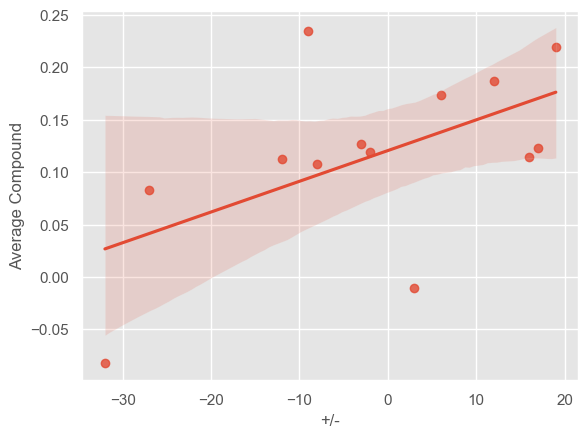

In [83]:
sns.regplot(data=merged_df, x = '+/-' , y ='Average Compound')